# World Happiness Report

The World Happiness Report is a measure of the state of global happiness based on various quality of life factors. Results from these are used to inform multiple governments and organizations of policy-making decisions, as well as aid experts in the assessment of a nation's progress. For this notebook, we will be exploring some trends from 2015 to 2019, as well as study the correlations in the 2019 dataset.

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# import data
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')

## Data Cleaning

In [46]:
# drop NA values
df_2015.dropna(inplace = True)
df_2016.dropna(inplace = True)
df_2017.dropna(inplace = True)
df_2018.dropna(inplace = True)
df_2019.dropna(inplace = True)

In [47]:
# rename columns

column_names = ['country', 'happiness-rank', 'happiness-score', 'gdp-per-capita', 'social-support', 'healthy-life-expectancy', 'freedom', 'generosity', 'government-trust']

df_2015.columns.values[[0, 2, 3, 5, 6, 7, 8, 10, 9]] = column_names
df_2016.columns.values[[0, 2, 3, 6, 7, 8, 9, 11, 10]] = column_names
df_2017.columns.values[[0, 1, 2, 5, 6, 7, 8, 9, 10]] = column_names
df_2018.columns.values[[1, 0, 2, 3, 4, 5, 6, 7, 8]] = column_names
df_2019.columns.values[[1, 0, 2, 3, 4, 5, 6, 7, 8]] = column_names

df_2015.rename(columns={'Region': 'region'}, inplace = True)
df_2016.rename(columns={'Region': 'region'}, inplace = True)

In [48]:
# determine which countries do not have information on regions
unique_countries = pd.concat([df_2015['country'], df_2016['country'], df_2017['country'], df_2018['country'], df_2019['country']]).unique()
countries_with_region = pd.concat([df_2015['country'], df_2016['country']])
region = pd.concat([df_2015['region'], df_2016['region']])
missing_countries = [country for country in unique_countries if country not in countries_with_region.unique()]

print (f'Countries with No Mapped Region: {missing_countries}')

Countries with No Mapped Region: ['Taiwan Province of China', 'Hong Kong S.A.R., China', 'Trinidad & Tobago', 'Northern Cyprus', 'North Macedonia', 'Gambia']


In [49]:
#set country to region map
country_region_map = dict(zip(countries_with_region, region))
country_region_map['Taiwan Province of China'] = 'Eastern Asia'
country_region_map['Hong Kong S.A.R., China'] = 'Eastern Asia'
country_region_map['Trinidad & Tobago'] = 'Latin America and Caribbean'
country_region_map['Northern Cyprus'] = 'Middle East and Northern Africa'
country_region_map['North Macedonia'] ='Central and Eastern Europe'
country_region_map['Gambia'] = 'Sub-Saharan Africa'

# add region column to 2017 - 2019 datasets
df_2017['region'] = df_2017['country'].map(country_region_map)
df_2018['region'] = df_2018['country'].map(country_region_map)
df_2019['region'] = df_2019['country'].map(country_region_map)

column_names.append('region')

In [50]:
# add year column
df_2015['year'] = 2015
df_2016['year'] = 2016
df_2017['year'] = 2017
df_2018['year'] = 2018
df_2019['year'] = 2019
column_names.append('year')

# compile dataframes
df = pd.concat([df_2015[column_names], df_2016[column_names], df_2017[column_names], df_2018[column_names], df_2019[column_names]])

## Data Visualization

### Historical Data

We will be getting the Top 5 and Bottom 5 countries based on the 2019 data and look at their trends for the last 5 years.

In [51]:
top_5_countries = df_2019['country'][df_2019['happiness-rank'] < 6].unique()
mask_top_5 = df.country.isin(top_5_countries)
historical_top_5 = df[mask_top_5].pivot('year' , 'country', 'happiness-score').dropna(axis=1)

historical_top_5

country,Denmark,Finland,Iceland,Netherlands,Norway
year,,,,,
2015,7.527,7.406,7.561,7.378,7.522
2016,7.526,7.413,7.501,7.339,7.498
2017,7.522,7.469,7.504,7.377,7.537
2018,7.555,7.632,7.495,7.441,7.594
2019,7.600,7.769,7.494,7.488,7.554


In [52]:
bottom_5_countries = df_2019['country'][df_2019['happiness-rank'] > (df_2019['happiness-rank'].max() - 7)].unique()
mask_bottom_5 = df.country.isin(bottom_5_countries)
historical_bottom_5 = df[mask_bottom_5].pivot('year' , 'country', 'happiness-score').dropna(axis=1)
historical_bottom_5

country,Afghanistan,Malawi,Rwanda,Tanzania,Yemen
year,,,,,
2015,3.575,4.292,3.465,3.781,4.077
2016,3.360,4.156,3.515,3.666,3.724
2017,3.794,3.970,3.471,3.349,3.593
2018,3.632,3.587,3.408,3.303,3.355
2019,3.203,3.410,3.334,3.231,3.380


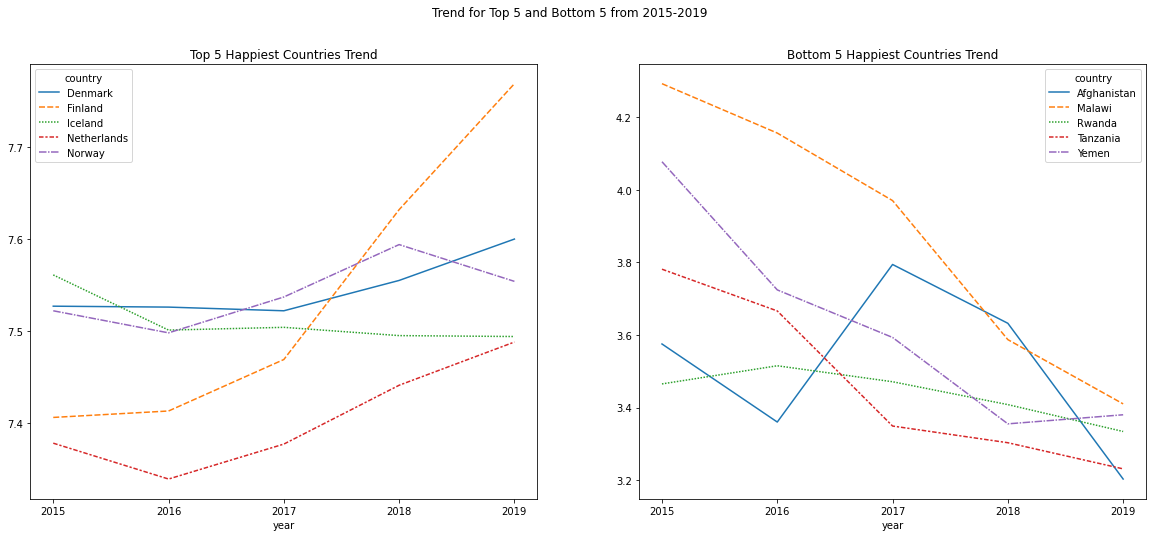

In [53]:
fig, axes = plt.subplots(1, 2, sharex = True, figsize=(20,8))
fig.suptitle('Trend for Top 5 and Bottom 5 from 2015-2019')
axes[0].set_title('Top 5 Happiest Countries Trend')
sns.lineplot(ax = axes[0], data = historical_top_5)
plt.xticks(df['year'].unique())

axes[1].set_title('Bottom 5 Happiest Countries Trend')
sns.lineplot(ax = axes[1], data = historical_bottom_5)

plt.show()